Unit_6_Python_APIs
Melissa Morgan


# WeatherPy

----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# URL for get requests
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Create dictionary
params = {"units": "imperial", "appid": api_key}

In [4]:
# Create DataFrame 
data_df = pd.DataFrame(columns=['City','Cloudiness','Country','Date','Humidity','Lat','Lng', 'Max Temp', 'Wind Speed'])

In [5]:
# Create loop
record_count = 1

for i, city in enumerate(cities): 
    params["q"] = city

    try:
        response = requests.get(base_url, params = params).json()
        data_df.loc[i, "City"] = city
        data_df.loc[i, "Cloudiness"] = response['clouds']['all']
        data_df.loc[i, "Country"] = response['sys']['country']      
        data_df.loc[i, "Date"] = response['dt']       
        data_df.loc[i, "Humidity"] = response['main']['humidity']  
        data_df.loc[i, "Lat"] = response['coord']['lat']
        data_df.loc[i, "Lng"] = response['coord']['lon']
        data_df.loc[i, "Max Temp"] = response['main']['temp_max']
        data_df.loc[i, "Wind Speed"] = response['wind']['speed']              
        print(f"Processing Record {record_count} | {city}")
    
    except:
        print(f"City not found. Skipping...") 
    record_count += 1

# Print message for completion                 
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 | rorvik
Processing Record 2 | rikitea
Processing Record 3 | georgetown
Processing Record 4 | jackson
Processing Record 5 | grootfontein
Processing Record 6 | praia da vitoria
City not found. Skipping...
Processing Record 8 | port alfred
Processing Record 9 | cabo san lucas
City not found. Skipping...
Processing Record 11 | kapaa
Processing Record 12 | naze
Processing Record 13 | hovd
Processing Record 14 | nanortalik
Processing Record 15 | vaini
Processing Record 16 | albany
Processing Record 17 | tuktoyaktuk
Processing Record 18 | butaritari
Processing Record 19 | bilibino
Processing Record 20 | hermanus
Processing Record 21 | arraial do cabo
Processing Record 22 | cape town
Processing Record 23 | ushuaia
Processing Record 24 | nikolskoye
Processing Record 25 | ilulissat
Processing Record 26 | ubinskoye
Processing Record 27 | san cristobal
Processing Record 28 | dikson
Processing Record 29 | cairns
Processing Record 30 | busselton
City not found. Skipping...
Proce

Processing Record 254 | aksu
Processing Record 255 | biltine
Processing Record 256 | pochutla
Processing Record 257 | susanino
City not found. Skipping...
Processing Record 259 | mazagao
City not found. Skipping...
Processing Record 261 | dodge city
Processing Record 262 | baruun-urt
Processing Record 263 | haines junction
City not found. Skipping...
Processing Record 265 | oparino
Processing Record 266 | puerto ayora
Processing Record 267 | dingle
Processing Record 268 | berkakit
Processing Record 269 | vilyuysk
Processing Record 270 | ulaanbaatar
Processing Record 271 | agadir
Processing Record 272 | shenjiamen
Processing Record 273 | sao filipe
Processing Record 274 | dwarka
Processing Record 275 | maniitsoq
Processing Record 276 | lyuban
Processing Record 277 | batamshinskiy
Processing Record 278 | cayenne
Processing Record 279 | camara de lobos
Processing Record 280 | sabang
Processing Record 281 | kalmunai
City not found. Skipping...
Processing Record 283 | porto novo
Processing 

Processing Record 503 | the pas
Processing Record 504 | codrington
Processing Record 505 | filadelfia
Processing Record 506 | saulkrasti
Processing Record 507 | baghdad
Processing Record 508 | kambove
City not found. Skipping...
Processing Record 510 | eyl
Processing Record 511 | guilin
Processing Record 512 | arman
Processing Record 513 | tingi
City not found. Skipping...
Processing Record 515 | pychas
Processing Record 516 | alzamay
Processing Record 517 | valparaiso
Processing Record 518 | sibu
Processing Record 519 | rawson
Processing Record 520 | rongcheng
Processing Record 521 | jaisalmer
Processing Record 522 | grand gaube
Processing Record 523 | namatanai
Processing Record 524 | lethem
Processing Record 525 | vila franca do campo
City not found. Skipping...
Processing Record 527 | challapata
Processing Record 528 | ust-ishim
Processing Record 529 | labuhan
Processing Record 530 | tucurui
Processing Record 531 | ucluelet
Processing Record 532 | tuatapere
Processing Record 533 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Export the city data into a .csv
# Note to avoid any issues later, use encoding="utf-8"
data_df.to_csv(r"C:\Users\Melissa Morgan\Documents\SMU\SMU_Homework\Unit_06_Python_APIs\weather_data.csv", index = None, encoding="utf-8", header=True)

In [7]:
# Display the DataFrame
data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rorvik,0,NO,1570136241,64,64.86,11.24,37.99,8.05
1,rikitea,98,PF,1570136340,76,-23.12,-134.97,68.99,16.4
2,georgetown,20,GY,1570136340,66,6.8,-58.16,89.6,11.41
3,jackson,1,US,1570136079,47,32.3,-90.18,96.8,4.7
4,grootfontein,20,NA,1570136340,14,-19.56,18.1,61.58,5.44
5,praia da vitoria,20,PT,1570136341,77,38.73,-27.07,69.8,13.29
6,belushya guba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,port alfred,84,ZA,1570136341,87,-33.59,26.89,59,3.11
8,cabo san lucas,20,MX,1570136220,54,22.89,-109.91,88,14.99
9,illoqqortoormiut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Ignore missing data & Display Clean DataFrame
data_df.dropna(inplace= True)
data_df['Date'] = pd.to_datetime(data_df['Date'],unit='s')
data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rorvik,0,NO,2019-10-03 20:57:21,64,64.86,11.24,37.99,8.05
1,rikitea,98,PF,2019-10-03 20:59:00,76,-23.12,-134.97,68.99,16.4
2,georgetown,20,GY,2019-10-03 20:59:00,66,6.8,-58.16,89.6,11.41
3,jackson,1,US,2019-10-03 20:54:39,47,32.3,-90.18,96.8,4.7
4,grootfontein,20,NA,2019-10-03 20:59:00,14,-19.56,18.1,61.58,5.44
5,praia da vitoria,20,PT,2019-10-03 20:59:01,77,38.73,-27.07,69.8,13.29
7,port alfred,84,ZA,2019-10-03 20:59:01,87,-33.59,26.89,59,3.11
8,cabo san lucas,20,MX,2019-10-03 20:57:00,54,22.89,-109.91,88,14.99
10,kapaa,75,US,2019-10-03 20:57:00,70,22.08,-159.32,84.2,18.34
11,naze,98,NG,2019-10-03 20:59:02,96,5.43,7.07,72.59,1.9


In [13]:
# Display the DataFrame
data_df.count()

City          550
Cloudiness    550
Country       550
Date          550
Humidity      550
Lat           550
Lng           550
Max Temp      550
Wind Speed    550
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

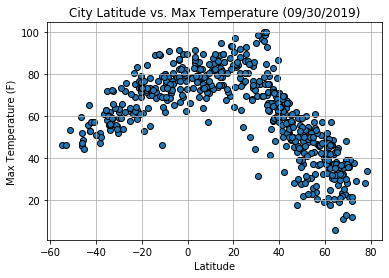

In [14]:
# Build a scatter plot 
plt.scatter(data_df["Lat"], data_df["Max Temp"], edgecolor = 'black')

# Incorporate other graph properties
plt.title("City Latitude vs. Max Temperature (09/30/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save an image of the chart to view in a folder
plt.savefig("Lat_vs_Temp.png")

#### Latitude vs. Humidity Plot

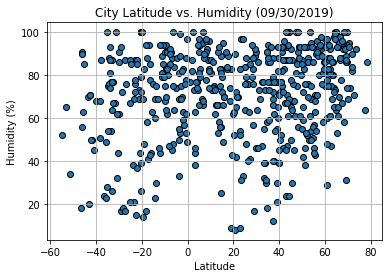

In [16]:
# Build a scatter plot 
plt.scatter(data_df["Lat"], data_df["Humidity"], edgecolor = 'black')

# Incorporate other graph properties
plt.title("City Latitude vs. Humidity (09/30/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save an image of the chart to view in a folder
plt.savefig("Lat_vs_Humidity.png")

#### Latitude vs. Cloudiness Plot

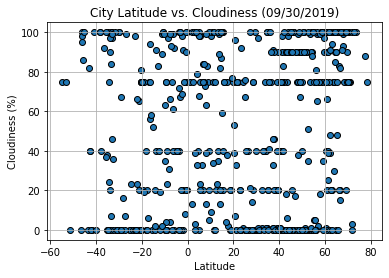

In [18]:
# Build a scatter plot 
plt.scatter(data_df["Lat"], data_df["Cloudiness"], edgecolor = 'black')

# Incorporate other graph properties
plt.title("City Latitude vs. Cloudiness (09/30/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save an image of the chart to view in a folder
plt.savefig("Lat_vs_Cloudiness.png")

#### Latitude vs. Wind Speed Plot

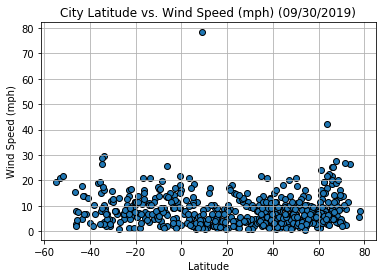

In [20]:
# Build a scatter plot 
plt.scatter(data_df["Lat"], data_df["Wind Speed"], edgecolor = 'black')

# Incorporate other graph properties
plt.title("City Latitude vs. Wind Speed (mph) (09/30/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save an image of the chart to view in a folder
plt.savefig("Lat_vs_Wind_Speed.png")